<a href="https://colab.research.google.com/github/vvalsecchi/Software_Quality_Evaluation_Project/blob/main/vladi_valsecchi_730030_SQE_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Software Quality Evaluation Project
* Vladi VALSECCHI 730030 

##Imports

In [2]:
#import PANDAS
import pandas as pd

#import MATPLOTLIB
import matplotlib.pyplot as plt

#import SEABORN
import seaborn as sns
#import SKLEARN
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, roc_auc_score, auc, classification_report, confusion_matrix, accuracy_score

#import NUMPY
import numpy as np

#import PLOTLY
import plotly.express as px
import plotly.graph_objs as go

#import PROGRESSBAR
import progressbar

## Dataset URL

In [3]:
url="https://raw.githubusercontent.com/vvalsecchi/Software_Quality_Evaluation_Project/main/ant-1.7.csv"

## Functions

###Dataset loading functions

In [4]:
#return a csv file in dataframe format
def load_dataset(ds_link):
  return pd.read_csv(ds_link)#load dataset

In [5]:
#check null values of the dataframe
def check_null_df(df):
    print(df.isnull().sum())#see if there are any missing values

###Dataset description functions

In [6]:
#print shape and columns of a dataframe
def df_structure(df):
    print("shape: ",df.shape)
    print("columns: ",df.columns)

###Feature selection functions

In [7]:
#dataframe correlation matrix
def correlation_matrix(df,tit):
    corr = df[df.columns].corr()
    f, ax = plt.subplots(figsize=(15, 10))
    ax.set_title(f'{tit}'+' Correlation Matrix')
    ax=sns.heatmap(corr, cmap="YlGnBu", annot = True)

In [8]:
#return kbest features list
def k_best_features(df):
    X=df.iloc[:,3:21].values
    y=df.iloc[:, 23].values
    k_best_features=SelectKBest(chi2,k=3)
    k_best_features=k_best_features.fit(X,y)
    chi2_scores =  pd.DataFrame(list(zip(df.columns[3:21], k_best_features.scores_, k_best_features.pvalues_)), columns=['ftr', 'score', 'pval'])
    print(chi2_scores)
    k_features = np.asarray(df.iloc[:, 3:21].columns)[k_best_features.get_support()]
    print()
    print("K best features: ",k_features)
    plt.figure(figsize=(12, 10))
    g = sns.barplot(x=chi2_scores["ftr"], y= chi2_scores["score"], color="magenta")
    for p in g.patches:
      g.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    plt.title("Results")
    plt.xlabel("Feature", size=14)
    plt.ylabel("Score", size=14)
    return k_features

In [9]:
#return r2 value of selected feature
def test_r2(df, feature):
  print("Test R squared error of feature ",feature," with fixed random state")
  X=df[[feature]]
  y=df[["bug"]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
  lm = LinearRegression()
  lm.fit(X_train, y_train)
  prediction = lm.predict(X_test)
  print('R squared error', r2_score(y_test, prediction))

In [10]:
#return df with only selected features
def create_df_selected(df,f1,f2,f3):
  return df[[f1,f2,f3,"bug"]]#keep only selected columns

###Data visualization functions

In [11]:
#plot pairplot of a dataframe
def pairplot(df):
    sns.pairplot(df)

In [12]:
#return df with the added column is_bugged
def add_is_bugged(df):
  df_dummy=df.copy()
  df_dummy["is_bugged"]=0
  notBugged = yesBugged = 0
  for x in range(df_dummy.shape[0]):
      if df_dummy["bug"].iloc[x] == 0:
          df_dummy["is_bugged"].iloc[x] = 0
      else:
          df_dummy["is_bugged"].iloc[x] =  1
  return df_dummy

In [57]:
#plot interactive pieplot
def interactive_pie(df):
  dummy=df.is_bugged.value_counts().to_frame()
  dummy['num']=dummy.index
  fig = px.pie(dummy, values='is_bugged', names='num', title='Bugged and not bugged elements')
  fig.show(render="png")

In [13]:
#plot interactive pieplot2
def interactive_pie_2(df):
  dummy=df.bug.value_counts().to_frame()
  dummy['num']=dummy.index
  fig = px.pie(dummy, values='bug', names='num', title='Bug values')
  fig.show()

In [14]:
#plot countplot of selected feature
def countplot_feature(df,feature):
    print("Countplot of ",feature," feature")
    sns.countplot(x=df[feature], data = df)

In [15]:
#plot histplot of selected feature
def histplot_feature(df, feature, color):
  print("Histplot of ",feature," feature")
  df[feature].plot(kind="hist", color=color)

In [16]:
#plot boxplot of selected feature
def boxplot_feature(df ,feature):
    tit="Distribution of " + feature  
    fig = go.Figure()
    fig.add_trace(go.Box(y=df[feature], name=""))
    fig.update_layout(title=tit ,yaxis_title=feature,xaxis_title="Distribution of " + feature)
    fig.show()

In [17]:
#plot scatterplot of feature x and bug
def scatter_ind_bug(df,feature_x):
    fig = px.scatter(df, x=feature_x, y="bug", color="bug", hover_data=['bug', feature_x],title="'"+feature_x+"' and 'bug':")
    fig.show() 

###Descriptive statistics functions

In [18]:
#create df with only records with bugs
def create_df_bug(df):
  df_bug=df.copy()#copy dataframe
  df_bug = df_bug.drop(df_bug[df_bug["is_bugged"]==0].index)
  df_bug = df_bug[["rfc", "loc", "wmc", "bug"]]#keep only selected columns
  return df_bug

In [19]:
#create df with only records without bugs
def create_df_no_bug(df):
  df__no_bug=df.copy()#copy dataframe
  df__no_bug = df__no_bug.drop(df__no_bug[df__no_bug["is_bugged"]==1].index)
  df__no_bug = df__no_bug[["rfc", "loc", "wmc", "bug"]]#keep only selected columns
  return df__no_bug

In [20]:
#print the number of bugged and not bugged elements in the df
def count_bugged_and_not(df):
  a=df['is_bugged'].value_counts()
  print("Elements without bugs: ",a[0])
  print("Elements with bugs: ",a[1])

In [21]:
#print min, max, mean and standard deviation of a selected feature
def min_max_mean_dev(df, feature):
  print("The minimum number of ",feature,": ", df[feature].min())
  print("The maximum number of ",feature,": ", df[feature].max())
  print("The average number of ",feature,": ", df[feature].mean())
  print("The value of the standard deviation of the feature ",feature,": ", df[feature].std())
  print("")

In [22]:
#print the number of bugs and how many record have that number of bugs
def show_bug_numbers(df):
  print("# of bugs, total records")
  print(df["bug"].value_counts())

###Linear Regression functions



In [23]:
#print first five elements of a list
def show_top5(rs_list):
  for i in range(5):
    print(rs_list[i])

In [24]:
#get 5 random states based on R2 value
def find_top5_random_states(df,feature):
  X = df[[feature]]
  y = df['bug']
  list1=[]
  bar = progressbar.ProgressBar()
  for cyc in bar(range(60000)):
    list2=[]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = cyc)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    prediction = lm.predict(X_test)
    list2.append(r2_score(y_test, prediction))
    list2.append(metrics.mean_squared_error(y_test, prediction))
    list2.append(cyc)
    list1.append(list2)
  list1.sort(reverse=True)
  print("\nTop 5 random states for ",feature," by R2 score:")
  print("[R2 value, MSE value, random state]\n")
  show_top5(list1)

In [25]:
#plot regression plots
def plot_reg(X,y,y_p):
    plt.scatter(X, y, color = 'blue')
    plt.plot(X, y_p, color = 'red')
    plt.title('Prediction over independent variable')
    plt.xlabel('independent')
    plt.ylabel('bug')
    plt.show()

In [26]:
#given dataframe, feature and random state computes the linear regression
def linear_regression(df,fs,RS):
  X = df[[fs]]
  y = df['bug']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = RS)
  lm = LinearRegression()
  lm.fit(X_train, y_train)
  prediction = lm.predict(X_test)
  plt.scatter(y_test, prediction)###y test vs prediction
  df1 = pd.DataFrame({'Actual': y_test, 'Predicted':prediction})
  df2 = df1.head(10)
  df2
  df2.plot(kind = 'bar')
  print('MAE', metrics.mean_absolute_error(y_test, prediction))
  print('MSE', metrics.mean_squared_error(y_test, prediction))
  print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
  print('R squared error', r2_score(y_test, prediction))
  plt.show()
  plot_reg(X_test,y_test,prediction)

In [27]:
#return dataframe with bug and a independent feature
def create_df_ind_dep(df,ind_feature):
    dff=df[[ind_feature,"bug"]]
    return dff

In [28]:
#return dataframe with outlier removed via quantile method
def outlier_remover(df,feature):
  q_low = df_selected[feature].quantile(0.01)
  q_hi  = df_selected[feature].quantile(0.99)
  df_filtered = df[(df[feature] < q_hi) & (df[feature] > q_low)]
  return df_filtered

In [29]:
#plot a double interactive boxplot of a feature in 2 different dataframes
def double_boxplot(df1 ,df2, feature):
    tit="Distribution of "+feature+" before and after outlier removal"
    fig = go.Figure()
    fig.add_trace(go.Box(y=df1[feature], name="before"))
    fig.add_trace(go.Box(y=df2[feature], name="after"))
    fig.update_layout(title=tit, yaxis_title=feature ,xaxis_title="")
    fig.show()

In [30]:
#return X_test and prediction
def get_reg_xp(df,feature,rs):
  X = df[[feature]]
  y = df['bug']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = rs)
  lm = LinearRegression()
  lm.fit(X_train, y_train)
  prediction = lm.predict(X_test)
  return X_test, prediction

In [31]:
#plot an overlapped graph to compare the linear regression before and after outlier removal
def plot_reg_overlap(df_o, df_f, feature, rs_o, rs_f):#df_o is with outliers, df_f is filtered
  X1 = df_o[feature]
  X2 = df_f[feature]
  Y1 = df_o["bug"]
  Y2 = df_f["bug"]
  X_o,pred_o=get_reg_xp(df_o,feature,rs_o)
  X_f,pred_f=get_reg_xp(df_f,feature,rs_f)
  f = plt.figure()
  f.set_figwidth(9)
  f.set_figheight(9)
  plt.scatter(X1,Y1,color='red')
  plt.scatter(X2,Y2,color='blue')
  plt.plot(X_o,pred_o,  color="green", linewidth=4)
  plt.plot(X_f,pred_f, color="magenta",linewidth=4)
  plt.xlabel("bug")
  plt.ylabel(feature)
  plt.show()

###Correlation functions

In [32]:
#return array with correlation of a given feature and bug
def correlation(df,feature):
    r_bug = df.bug.corr(df[feature])#R correlation between bug and given feature
    rho_bug = df.bug.corr(df[feature], method='spearman')#RHO correlation between bug and given feature
    tau_bug = df.bug.corr(df[feature], method='kendall')#TAU correlation between bug and given feature
    print("Pearson's r: ",r_bug)
    print("Spearman's rho: ",rho_bug)
    print("Kendall's tau: ",tau_bug)
    data=[["Pearson",r_bug], [ "Spearman",rho_bug],["Kendall",tau_bug]]
    return data

In [33]:
#return array with correlation of a given feature and bug
def correlation_filtered(df,feature):
    r_bug = df.bug.corr(df[feature])#R correlation between bug and given feature
    rho_bug = df.bug.corr(df[feature], method='spearman')#RHO correlation between bug and given feature
    tau_bug = df.bug.corr(df[feature], method='kendall')#TAU correlation between bug and given feature
    print("Pearson's r: ",r_bug)
    print("Spearman's rho: ",rho_bug)
    print("Kendall's tau: ",tau_bug)
    data=[["Pea_fil",r_bug], [ "Spe_fil",rho_bug],["Ken_fil",tau_bug]]
    return data

In [34]:
#plot the correlation results given an array
def correlation_plot(data,tit):
    if tit=="pos":
        ali='bottom'
    else:
        ali='top'
    colors=["red", "lime", "cyan"]
    df = pd.DataFrame(data, columns=['Method', 'Value'])
    plt.bar(df["Method"],df["Value"], align='center',color=colors, edgecolor='black',linewidth=0.5)
    plt.xticks(df["Method"])
    plt.ylabel("Value")
    plt.xlabel("Methods")
    plt.title(tit)
    for index,data in enumerate(df["Value"]):
        plt.text(x=index , y =data , s=f"{data}"[:8] , fontdict=dict(fontsize=11,horizontalalignment='center',
        verticalalignment=ali))

In [35]:
#merge two lists
def merge_lists(l1,l2):
  return l1+l2

###Logistic Regression functions

In [36]:
#train test split logistic regression
def feature_selection_lr(df, rs):
    label="is_bugged"
    ignore_cols=[label,"bug"]
    features=[c for c in df.columns if c not in ignore_cols]
    X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(df[features], df[label], test_size = 0.30,random_state=rs)
    return X_train_LR, X_test_LR, y_train_LR, y_test_LR

In [37]:
#train logistic regression model
def lrm_train(X_train, y_train):
    lrm = LogisticRegression(solver='liblinear')#define logistic regressor
    lrm.fit(X_train, y_train)#fit model
    return lrm

In [38]:
#get prediction of a trained logistic regression model
def lrm_test(lr,X_test):
  predictions = lr.predict(X_test)#make prediction with test set
  return predictions

In [39]:
#print confusion matrix, classification report and accuracy value
def conf_class_rep(y_test, predictions):
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))
    accuracy = accuracy_score(y_test, predictions)*100
    print("accuracy is", str(round(accuracy, 2)) + ' %.')

In [40]:
#executes the full logistic regression procedure
def full_logistic_regression(df,rs):
  X_train_LR, X_test_LR, y_train_LR, y_test_LR=feature_selection_lr(df_selected,rs)
  lrm=lrm_train(X_train_LR, y_train_LR)
  predictions_lrm=lrm_test(lrm,X_test_LR)
  conf_class_rep(y_test_LR, predictions_lrm)

In [41]:
#get 5 random states based on accuracy value
def find_top5_random_states_LR(df):
  list1=[]
  bar = progressbar.ProgressBar()
  for cyc in bar(range(60000)):
    list2=[]
    X_train, X_test, y_train, y_test=feature_selection_lr(df,cyc)
    lrm=lrm_train(X_train,y_train)
    predictions = lrm_test(lrm,X_test)
    accuracy = accuracy_score(y_test, predictions)*100
    fixed_accuracy=round(accuracy, 5)
    list2.append(fixed_accuracy)
    list2.append(cyc)
    list1.append(list2)
  list1.sort(reverse=True)
  print("\nTop 5 random states for Logistic Regression by accuracy score:")
  print("[Accuracy, random state]\n")
  show_top5(list1)

## Import dataset

In [42]:
df=load_dataset(url)
df_structure(df)
df.head(3)

shape:  (745, 24)
columns:  Index(['name', 'version', 'name.1', 'wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom',
       'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic',
       'cbm', 'amc', 'max_cc', 'avg_cc', 'bug'],
      dtype='object')


,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,ant,1.7,org.apache.tools.ant.taskdefs.rmic.RmicAdapter...,3,1,0,10,18,3,1,9,1,1.100,106,0.0,0,0.0,0.444444,0,0,32.666667,1,0.6667,0
1,ant,1.7,org.apache.tools.ant.taskdefs.optional.perforc...,5,2,0,4,13,0,1,4,4,0.625,76,1.0,1,0.7,0.500000,0,0,13.400000,1,0.6000,0
2,ant,1.7,org.apache.tools.ant.taskdefs.optional.junit.O...,1,2,0,1,3,0,0,1,1,2.000,7,0.0,0,1.0,1.000000,0,0,6.000000,0,0.0000,0


### Check null values

In [43]:
check_null_df(df)

name       0
version    0
name.1     0
wmc        0
dit        0
noc        0
cbo        0
rfc        0
lcom       0
ca         0
ce         0
npm        0
lcom3      0
loc        0
dam        0
moa        0
mfa        0
cam        0
ic         0
cbm        0
amc        0
max_cc     0
avg_cc     0
bug        0
dtype: int64


## Dataset description

This dataset contains 745 elements and their mesurements.

The csv file contains 24 fields:

* name: name of the source 
* version: version of the source 
* name.1: class name 
* wmc: weighted methods for class 
* dit: depth of inheritance tree noc: number of children 
* cbo: coupling between objects classes 
* rfc: response for a class 
* lcom: lack of cohesion in methods 
* ca: afferent couplings 
* ce: efferent couplings 
* npm: number of public methods 
* lcom3: loc: line of code 
* dam: data access metric 
* moa: measure of aggregation 
* mfa: measure of functional abstraction 
* cam: cohesion among methods of class 
* ic: inheritance coupling 
* cbm: coupling between methods 
* amc: average method complexity 
* cc: mcCabe’s cyclomatic complexity 
* max_cc: max cyclomatic complexity
* avg_cc: average cyclomatic complexity
* bug: # of bugs

In [44]:
df.describe()

,version,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,1.700000e+00,11.071141,2.522148,0.731544,11.046980,34.362416,89.147651,5.655034,5.746309,8.365101,1.013342,280.071141,0.644855,0.726174,0.509968,0.474685,0.720805,1.312752,23.640870,4.669799,1.366053,0.453691
std,2.377473e-14,11.975963,1.398869,4.800357,26.343149,36.024972,349.937555,25.814223,5.653176,9.331319,0.619015,411.872075,0.438138,1.426581,0.398696,0.259931,0.938948,2.332602,76.986079,6.276853,0.881739,1.138673
min,1.700000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.700000e+00,4.000000,1.000000,0.000000,4.000000,11.000000,0.000000,0.000000,2.000000,3.000000,0.666667,52.000000,0.000000,0.000000,0.000000,0.269841,0.000000,0.000000,9.066667,1.000000,0.857100,0.000000
50%,1.700000e+00,7.000000,2.000000,0.000000,6.000000,23.000000,6.000000,1.000000,4.000000,6.000000,0.833333,143.000000,1.000000,0.000000,0.681818,0.437500,0.000000,0.000000,16.400000,3.000000,1.142900,0.000000
75%,1.700000e+00,14.000000,4.000000,0.000000,11.000000,43.000000,53.000000,4.000000,8.000000,10.000000,1.500000,323.000000,1.000000,1.000000,0.869919,0.666667,1.000000,2.000000,28.000000,6.000000,1.666700,0.000000
max,1.700000e+00,120.000000,7.000000,102.000000,499.000000,288.000000,6692.000000,498.000000,37.000000,103.000000,2.000000,4541.000000,1.000000,11.000000,1.000000,1.000000,5.000000,19.000000,2052.000000,53.000000,6.777800,10.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     745 non-null    object 
 1   version  745 non-null    float64
 2   name.1   745 non-null    object 
 3   wmc      745 non-null    int64  
 4   dit      745 non-null    int64  
 5   noc      745 non-null    int64  
 6   cbo      745 non-null    int64  
 7   rfc      745 non-null    int64  
 8   lcom     745 non-null    int64  
 9   ca       745 non-null    int64  
 10  ce       745 non-null    int64  
 11  npm      745 non-null    int64  
 12  lcom3    745 non-null    float64
 13  loc      745 non-null    int64  
 14  dam      745 non-null    float64
 15  moa      745 non-null    int64  
 16  mfa      745 non-null    float64
 17  cam      745 non-null    float64
 18  ic       745 non-null    int64  
 19  cbm      745 non-null    int64  
 20  amc      745 non-null    float64
 21  max_cc   745 non

## Feature selection

###Correlation matrix

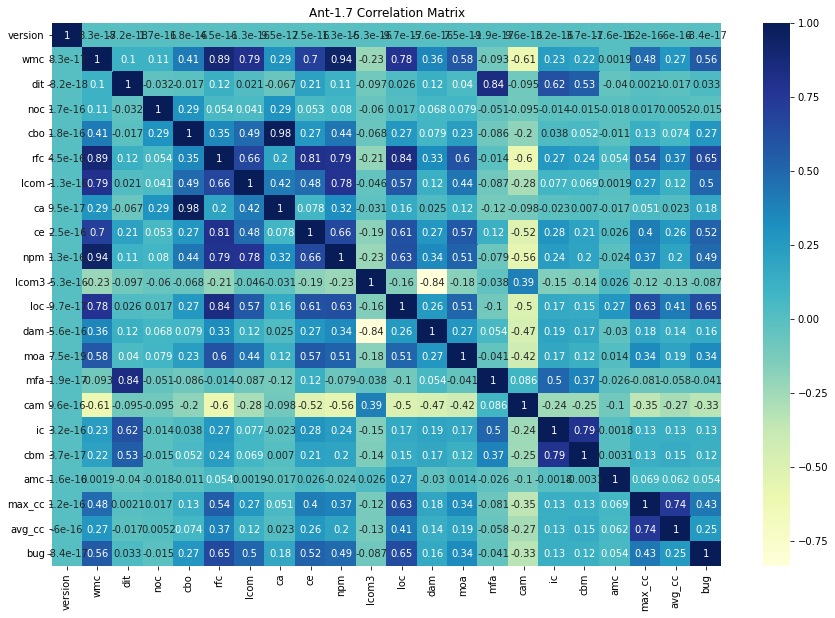

In [46]:
correlation_matrix(df,"Ant-1.7")

Best features from the correlation matrix are:
* rfc
* lcom
* wmc

###K Best Features

      ftr          score           pval
0     wmc    3540.023062   0.000000e+00
1     dit       8.085337   5.255697e-01
2     noc      27.226487   1.283035e-03
3     cbo   12206.905856   0.000000e+00
4     rfc   12691.096311   0.000000e+00
5    lcom  595241.770351   0.000000e+00
6      ca   21464.251188   0.000000e+00
7      ce    1282.676602  1.705487e-270
8     npm    2433.103830   0.000000e+00
9   lcom3       4.152249   9.011089e-01
10    loc  204625.362339   0.000000e+00
11    dam       9.742977   3.716906e-01
12    moa     315.539590   1.313916e-62
13    mfa       2.147167   9.889207e-01
14    cam      13.281598   1.502727e-01
15     ic      29.233860   5.917210e-04
16    cbm     128.312683   2.635805e-23
17    amc     755.840226  6.771209e-157

K best features:  ['lcom' 'ca' 'loc']


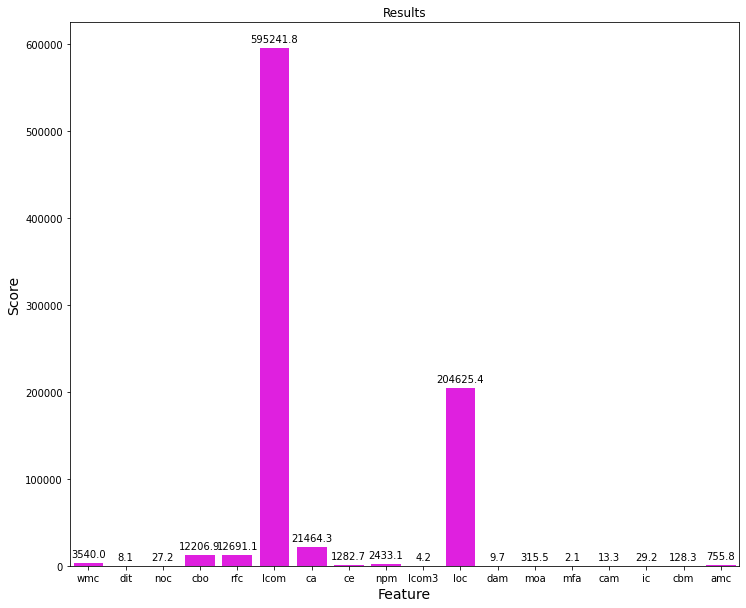

In [47]:
kbf=k_best_features(df)

Best features from the K best are:
* lcom
* ca
* loc

###Test R2 of K Best Features

In [48]:
test_r2(df,"lcom")
print()
test_r2(df,"ca")
print()
test_r2(df,"loc")

Test R squared error of feature  lcom  with fixed random state
R squared error 0.1741861215243018

Test R squared error of feature  ca  with fixed random state
R squared error -0.30484697955763496

Test R squared error of feature  loc  with fixed random state
R squared error 0.34815043036161464


###Test R2 of features selected by correlation degree

In [49]:
test_r2(df,"rfc")
print()
test_r2(df,"loc")
print()
test_r2(df,"wmc")

Test R squared error of feature  rfc  with fixed random state
R squared error 0.39111134150720617

Test R squared error of feature  loc  with fixed random state
R squared error 0.34815043036161464

Test R squared error of feature  wmc  with fixed random state
R squared error 0.2930365944956619


Feature selezionate in base al grado di correlazione: rfc, loc, wmc
In modo tale da vedere meglio le variazioni.

###Create dataframe with selected features

In [50]:
df_selected=create_df_selected(df,"rfc","loc","wmc")

In [51]:
df_structure(df_selected)
df_selected.head(3)

shape:  (745, 4)
columns:  Index(['rfc', 'loc', 'wmc', 'bug'], dtype='object')


,rfc,loc,wmc,bug
0,18,106,3,0
1,13,76,5,0
2,3,7,1,0


## Data visualization

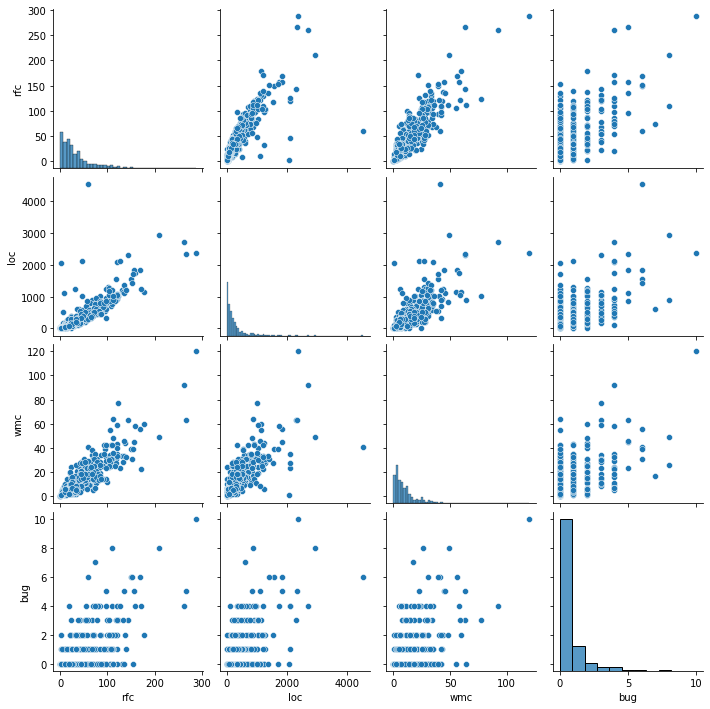

In [52]:
pairplot(df_selected)

Pairwise relationships in the dataframe.
The diagonal plots are a univariate distribution plot, made to show the marginal distribution of the data in each column.

In [53]:
df_selected=add_is_bugged(df_selected)

In [58]:
interactive_pie(df_selected)

77.7% of the elements are not bugged and 22.3% are bugged

In [ ]:
interactive_pie_2(df_selected)

* 77.7% 0 bugs
* 12.5% 1 bugs
* 4.03% 2 bugs
* 2.15% 3 bugs
* 2.01% 4 bugs
* 0.537% 6 bugs
* 0.537% 5 bugs
* 0.268% 8 bugs
* 0.134% 10 bugs
* 0.134% 7 bugs

In [ ]:
countplot_feature(df_selected,"bug")

In [ ]:
histplot_feature(df_selected,"rfc", "blue")

The most frequent rfc values are between 0 and 25

In [ ]:
histplot_feature(df_selected,"loc","purple")

The most frequent loc values are between 0 and 50

In [ ]:
histplot_feature(df_selected,"wmc","green")

The most frequent wmc values are between 0 and 10

In [ ]:
boxplot_feature(df_selected, "rfc")

* min: lower fence: 0 
* q1: 11
* median: 23
* q3: 43
* upper fence: 91
* max: 288

In [ ]:
boxplot_feature(df_selected, "loc")

* min: lower fence: 0 
* q1: 52
* median: 143
* q3: 324
* upper fence: 725
* max: 4541

In [ ]:
boxplot_feature(df_selected, "wmc")

* min: lower fence: 0 
* q1: 4
* median: 7
* q3: 14
* upper fence: 29
* max: 120

In [ ]:
boxplot_feature(df_selected, "bug")

* min: median: 0
* max: 10

In [ ]:
scatter_ind_bug(df_selected,"rfc")

The highest concentration of values is near the x axis with a x value lower than 100

In [ ]:
scatter_ind_bug(df_selected,"loc")

The highest concentration of values is near the x axis with a x value lower than 400

In [ ]:
scatter_ind_bug(df_selected,"wmc")

The highest concentration of values is near the x axis with a x value lower than 40

## Descriptive statistics

In [ ]:
df_bug=create_df_bug(df_selected)
df_no_bug=create_df_no_bug(df_selected)

In [ ]:
print("Description of df_selected")
df_dummy=df_selected[["rfc","loc","wmc","bug"]].copy()
df_dummy.describe()#all elements

In [ ]:
print("Description of df_bug")
df_bug.describe()#Only bugs

In [ ]:
print("Description of df_no_bug")
df_no_bug.describe()#Only no bugs

In [ ]:
count_bugged_and_not(df_selected)

In [ ]:
show_bug_numbers(df_selected)

In [ ]:
print("Textual description of df_selected \n")
min_max_mean_dev(df_selected,"rfc")
min_max_mean_dev(df_selected,"loc")
min_max_mean_dev(df_selected,"wmc")

In [ ]:
print("Textual description of df_bug \n")
min_max_mean_dev(df_bug,"rfc")
min_max_mean_dev(df_bug,"loc")
min_max_mean_dev(df_bug,"wmc")

In [ ]:
print("Textual description of df_no_bug \n")
min_max_mean_dev(df_no_bug,"rfc")
min_max_mean_dev(df_no_bug,"loc")
min_max_mean_dev(df_no_bug,"wmc")

## **Data** analysis

###Linear Regression

In [ ]:
#Create dataframes with only the dependent feature and the independent one
df_rfc=create_df_ind_dep(df_selected,"rfc")
df_structure(df_rfc)
df_rfc.head(3)

In [ ]:
df_loc=create_df_ind_dep(df_selected,"loc")
df_structure(df_loc)
df_loc.head(3)

In [ ]:
df_wmc=create_df_ind_dep(df_selected,"wmc")
df_structure(df_wmc)
df_wmc.head(3)

In [ ]:
find_top5_random_states(df_selected,"rfc")############################################

In [ ]:
find_top5_random_states(df_selected,"loc")############################################

In [ ]:
find_top5_random_states(df_selected,"wmc")############################################

In [ ]:
linear_regression(df_rfc,"rfc",46705)#46705

The prediction of the bug values with rfc as independet feature is accurate at 63%.

In [ ]:
rfc_corr=correlation(df_rfc,"rfc")
correlation_plot(rfc_corr,"Correlation of bug and rfc")

The correlation of bug and rfc obtained via Pearson's R is the highest with 0.65, followed by Spearman's RHO with 0.49 and Kendall's TAU with 0.4.

In [ ]:
linear_regression(df_loc,"loc",17280)#17280

The prediction of the bug values with loc as independet feature is accurate at 66%.

In [ ]:
loc_corr=correlation(df_loc,"loc")
correlation_plot(loc_corr,"Correlation of bug and loc")

The correlation of bug and loc obtained via Pearson's R is the highest with 0.64, followed by Spearman's RHO with 0.49 and Kendall's TAU with 0.39.

In [ ]:
linear_regression(df_wmc,"wmc",54184)#54184

The prediction of the bug values wmc rfc as independet feature is accurate at 57%.

In [ ]:
wmc_corr=correlation(df_wmc,"wmc")
correlation_plot(wmc_corr,"Correlation of bug and wmc")

The correlation of bug and wmc obtained via Pearson's R is the highest with 0.56, followed by Spearman's RHO with 0.43 and Kendall's TAU with 0.35.


#### Outlier removal for Linear Regression

In [ ]:
#Remove outliers
df_rfc_filtered=outlier_remover(df_rfc, "rfc")
df_structure(df_rfc_filtered)
df_rfc_filtered.head(3)

In [ ]:
df_loc_filtered=outlier_remover(df_loc, "loc")
df_structure(df_loc_filtered)
df_loc_filtered.head(3)

In [ ]:
df_wmc_filtered=outlier_remover(df_wmc, "wmc")
df_structure(df_loc_filtered)
df_loc_filtered.head(3)

RFC before and after

In [ ]:
print("rfc and bug before outlier removal")
pairplot(df_rfc)

In [ ]:
print("rfc and bug after outlier removal")
pairplot(df_rfc_filtered)

In [ ]:
double_boxplot(df_rfc,df_rfc_filtered,"rfc")

With the graph is possible to see that only the values over 157 were removed.


LOC before and after

In [ ]:
print("loc and bug before outlier removal")
pairplot(df_loc)

In [ ]:
print("loc and bug after outlier removal")
pairplot(df_loc_filtered)

In [ ]:
double_boxplot(df_loc,df_loc_filtered,"loc")

With the graph is possible to see that only the values over 2098 were removed.


WMC before and after

In [ ]:
print("wmc and bug before outlier removal")
pairplot(df_wmc)

In [ ]:
print("wmc and bug after outlier removal")
pairplot(df_wmc_filtered)

In [ ]:
double_boxplot(df_wmc,df_wmc_filtered,"wmc")

With the graph is possible to see that only the values over 58 were removed.


####Linear regression without outliers

In [ ]:
find_top5_random_states(df_rfc_filtered,"rfc")############################################

In [ ]:
find_top5_random_states(df_loc_filtered,"loc")############################################

In [ ]:
find_top5_random_states(df_wmc_filtered,"wmc")############################################

In [ ]:
linear_regression(df_rfc_filtered,"rfc",56096)#56096

The prediction of the bug values with rfc as independent feature is accurate at 51% after removing the outlier values.
The R2 error is decreased.

In [ ]:
rfc_corr_filtered=correlation_filtered(df_rfc_filtered,"rfc")
correlation_plot(rfc_corr_filtered,"Correlation of bug and rfc after outlier removal")

The correlation of bug and rfc obtained, after the removal of the outliers, via Pearson's R is the highest with 0.55, followed by Spearman's RHO with 0.46 and Kendall's TAU with 0.38.


In [ ]:
linear_regression(df_loc_filtered,"loc",18443)#18443

The prediction of the bug values with loc as independent feature is accurate at 53% after removing the outlier values.
The R2 error is decreased.

In [ ]:
loc_corr_filtered=correlation_filtered(df_loc_filtered,"loc")
correlation_plot(loc_corr_filtered,"Correlation of bug and loc after outlier removal")

The correlation of bug and loc obtained, after the removal of the outliers, via Pearson's R is the highest with 0.55, followed by Spearman's RHO with 0.46 and Kendall's TAU with 0.37.


In [ ]:
linear_regression(df_wmc_filtered,"wmc",55037)#55037

The prediction of the bug values with wmc as independent feature is accurate at 42% after removing the outlier values.
The R2 error is decreased.

In [ ]:
wmc_corr_filtered=correlation_filtered(df_wmc_filtered,"wmc")
correlation_plot(wmc_corr_filtered,"Correlation of bug and wmc after outlier removal")

The correlation of bug and wmc obtained, after the removal of the outliers, via Pearson's R is the highest with 0.47, followed by Spearman's RHO with 0.41 and Kendall's TAU with 0.33.


####Comparison between regressions with and without outliers

In [ ]:
plot_reg_overlap(df_rfc,df_rfc_filtered,"rfc",46705,56096)#46705 RFC 56096

Without outliers the regression line is less angled than the one with outliers. In this case high values of rfc can produce higher quantity of bugs.

In [ ]:
plot_reg_overlap(df_loc,df_loc_filtered,"loc",17280,18443)#17280 LOC 18443


The two regression lines are almost identical so removing the outliers didn't change much the predictions.

In [ ]:
plot_reg_overlap(df_wmc,df_wmc_filtered,"wmc",54184,55037)#54184 WMC 55037

The two regression lines are almost identical so removing the outliers didn't change much the predictions.

####Comparison of correlation degree before and after outlier removal 

In [ ]:
correlation_plot(merge_lists(rfc_corr,rfc_corr_filtered),"Comparison between correlations before and after outlier removal of bug and rfc")

Removing the outliers caused the decrease of the correlation values in all three the methods used. The most significant decrease is with the Pearson's method, from 0.65 to 0.55. With Spearman's and Kendal's the decrease is very low (-0.2).

In [ ]:
correlation_plot(merge_lists(loc_corr,loc_corr_filtered),"Comparison between correlations before and after outlier removal of bug and rfc")

Removing the outliers caused the decrease of the correlation values in all three the methods used. The most significant decrease is with the Pearson's method, from 0.64 to 0.55. With Spearman's and Kendal's the decrease is very low (-0.3).

In [ ]:
correlation_plot(merge_lists(wmc_corr,wmc_corr_filtered),"Comparison between correlations before and after outlier removal of bug and rfc")

Removing the outliers caused the decrease of the correlation values in all three the methods used. The most significant decrease is with the Pearson's method, from 0.56 to 0.47. With Spearman's and Kendal's the decrease is very low (-0.2).

After seeing the results of the correlation computated before and after the outlier removal, it is clear that removing the outliers lowered the correlation degree in all three cases considerated.

###Logistic Regression

Elements are divided into two classes, class 0 and class 1. Elements in class 0 contain 0 bugs and elements in class 1 contain at least 1 bug.

In [ ]:
find_top5_random_states_LR(df_selected)#############################

In [ ]:
full_logistic_regression(df_selected,3856)#3856 90.625% acc

The overall accuracy of the logistic regression model is 90.62%, almost overfitting. This is caused by the large amount of elements belonging to class 0 (77%). Misclassification mainly occurs with elements of class 1, in this case almost 50% of elements belonging to class 1 are misclassificated. Even if the elements of class 0 are the majority of the elements, some are misclassificated into class 1.